# Decision Tree

Here, we will explore the data, and experiment with using a decision tree to process and predict future stock prices. 

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Within other files, it contains a preliminary exploration into the data. Here, we simply experiment with how the newly processed data experiments with a fitting to a decision tree. 

In [10]:
news_df = pd.read_csv('processed_data.csv')
news_df['time_published'] = pd.to_datetime(news_df['time_published'])
news_df['time_published'] = news_df['time_published'].dt.date
display(news_df)

,time_published,Adj Close,Al Jareeza,Associated Press,Barrons,Benzinga,Business Insider,Business Standard,CNBC,CNN,...,StockMarket.com,Stocknews.com,The Atlantic,The Economist,The Financial Express,The Street,The Week News,UPI Business,Wall Street Journal,Zacks Commentary
0,2023-09-01,374.475861,-1.0,0.011936,0.152958,0.173515,0.156254,-1.000000,-0.108245,-0.096847,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.193063
1,2023-09-05,374.951874,-1.0,-0.043037,-1.000000,0.224852,0.113085,-1.000000,0.080024,0.091604,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.204264
2,2023-09-06,371.649323,-1.0,0.062341,0.097872,0.255724,0.073166,-1.000000,-0.037002,-0.061244,...,-1.0,-1.0,0.114045,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.175756
3,2023-09-07,368.991455,-1.0,0.230936,-1.000000,0.206763,-0.019377,-1.000000,-0.107900,-0.198546,...,-1.0,-1.0,0.159195,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.214652
4,2023-09-08,369.507172,-1.0,-0.041194,-1.000000,0.163066,0.079105,-1.000000,-1.000000,-0.035941,...,-1.0,-1.0,-1.000000,-1.0,-1.0,0.209266,-1.0,-1.0,-1.0,0.198217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2024-08-26,474.672974,-1.0,-1.000000,-1.000000,0.195866,-1.000000,-1.000000,0.125910,-1.000000,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.169621
247,2024-08-27,476.090973,-1.0,-1.000000,-1.000000,0.190242,-1.000000,-1.000000,0.077878,-1.000000,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.176734
248,2024-08-28,470.688568,-1.0,-1.000000,-1.000000,0.215394,-1.000000,-1.000000,0.243668,-1.000000,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.170518
249,2024-08-29,469.999542,-1.0,-1.000000,-1.000000,0.212961,-1.000000,0.086343,0.087253,-1.000000,...,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.176690


In [35]:
X = combined_df.drop(['Adj Close', 'time_published'], axis=1)
y = combined_df["Adj Close"]

X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(
    X, y, combined_df['time_published'], test_size=0.3, random_state=506
)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1562.1550253122764
R-squared: 0.1762128418633614


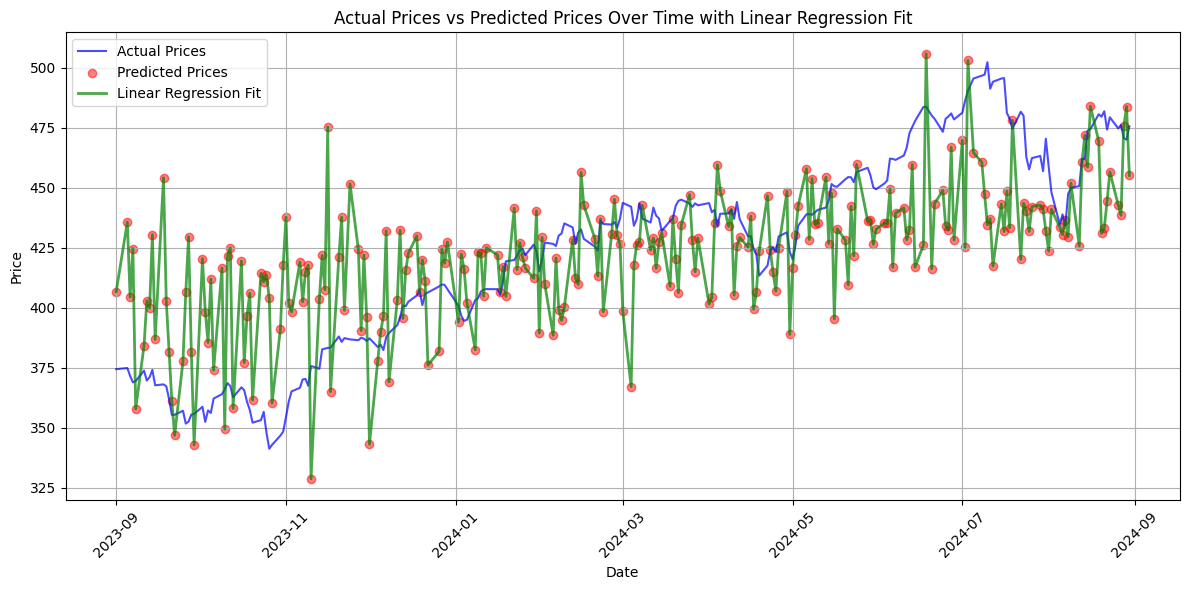

In [20]:
predictions_df = combined_df.copy()
predictions_df['predicted_price'] = model.predict(X)
fitted_values = model.predict(X)

plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(predictions_df['time_published'], y, color='blue',alpha = 0.7, label='Actual Prices')

# Plot predicted prices
plt.scatter(predictions_df['time_published'], predictions_df['predicted_price'], color='red', alpha = 0.5, label="Predicted Prices")

# Plot the linear regression fit line
plt.plot(predictions_df['time_published'], fitted_values, color='green', alpha = 0.7, label='Linear Regression Fit', linestyle='-', linewidth=2)

# Formatting the plot
plt.title('Actual Prices vs Predicted Prices Over Time with Linear Regression Fit')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

In [49]:
from sklearn import tree

clf = tree.DecisionTreeRegressor(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [50]:
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1828.8269734705816
R-squared: -0.10244499650041838


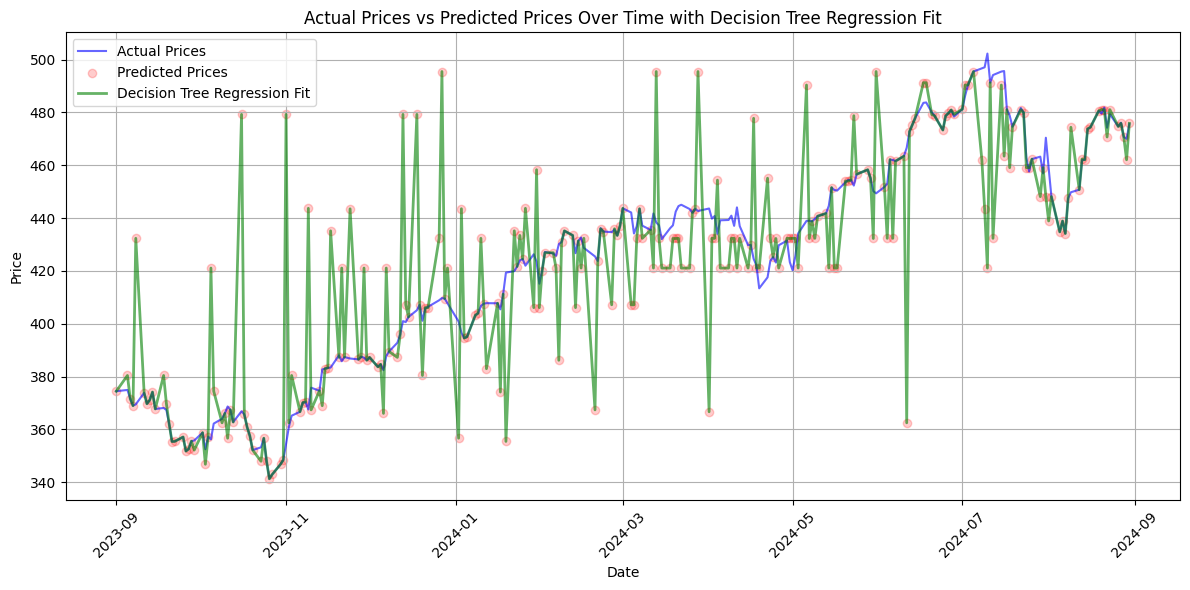

In [51]:
predictions_df = combined_df.copy()
predictions_df['predicted_price'] = clf.predict(X)
fitted_values = clf.predict(X)

plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(predictions_df['time_published'], y, color='blue',alpha = 0.6, label='Actual Prices')

# Plot predicted prices
plt.scatter(predictions_df['time_published'], predictions_df['predicted_price'], color='red', alpha = 0.2, label="Predicted Prices")

# Plot the decision tree regression fit line
plt.plot(predictions_df['time_published'], fitted_values, color='green', alpha = 0.6, label='Decision Tree Regression Fit', linestyle='-', linewidth=2)

# Formatting the plot
plt.title('Actual Prices vs Predicted Prices Over Time with Decision Tree Regression Fit')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

We conclude that using this decision tree is fairly accurate. Our R-squared is pretty good. Random spikes in the decision tree seem to be causing the mean-squared-error to be rather high. 

However, we must also note that this is likely simple overfitting. 

[Text(0.7084127286585366, 0.9545454545454546, 'x[27] <= 0.005\nsquared_error = 1675.072\nsamples = 175\nvalue = 420.876'),
 Text(0.5151486280487805, 0.8636363636363636, 'x[20] <= 0.007\nsquared_error = 1467.345\nsamples = 153\nvalue = 428.206'),
 Text(0.3862423780487805, 0.7727272727272727, 'x[22] <= 0.01\nsquared_error = 1310.863\nsamples = 110\nvalue = 438.822'),
 Text(0.296875, 0.6818181818181818, 'x[35] <= 0.073\nsquared_error = 1305.793\nsamples = 88\nvalue = 431.251'),
 Text(0.2035060975609756, 0.5909090909090909, 'x[25] <= 0.097\nsquared_error = 1136.877\nsamples = 85\nvalue = 433.958'),
 Text(0.08765243902439024, 0.5, 'x[7] <= -0.003\nsquared_error = 289.662\nsamples = 25\nvalue = 453.774'),
 Text(0.04573170731707317, 0.4090909090909091, 'x[10] <= 0.061\nsquared_error = 129.684\nsamples = 7\nvalue = 441.318'),
 Text(0.024390243902439025, 0.3181818181818182, 'x[4] <= 0.074\nsquared_error = 51.028\nsamples = 4\nvalue = 449.668'),
 Text(0.012195121951219513, 0.22727272727272727, '

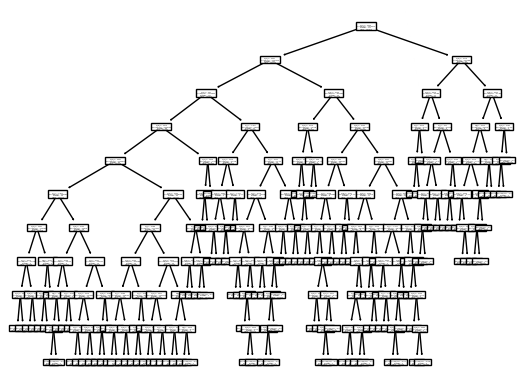

In [52]:
tree.plot_tree(clf)